In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import seaborn as sns # for visualiation

In [73]:
data = pd.read_csv('data/p4kreviews.csv', encoding='latin1', index_col=[0])

In [74]:
data.head()
# data.describe()

,album,artist,best,date,genre,review,score
1,A.M./Being There,Wilco,1,December 6 2017,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0
2,No Shame,Hopsin,0,December 6 2017,Rap,"On his corrosive fifth album, the rapper takes...",3.5
3,Material Control,Glassjaw,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6
4,Weighing of the Heart,Nabihah Iqbal,0,December 6 2017,Pop/R&B,"On her debut LP, British producer Nabihah Iqba...",7.7
5,The Visitor,Neil Young / Promise of the Real,0,December 5 2017,Rock,"While still pointedly political, Neil Youngs ...",6.7


# Data Prep

In [75]:
grouped_by_artist = data.groupby(['artist'])
grouped_by_artist

In [76]:
# Remove "Various Artists" since doesn't give us insight into a single artist.
reviews = data[data.artist != "Various Artists"]

In [77]:
# Convert date column to date values
reviews['date'] = pd.to_datetime(reviews['date'])

/Users/Avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
reviews["score_of_100"] = pd.to_numeric(reviews["score"]*10, downcast='integer')
reviews

/Users/Avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,album,artist,best,date,genre,review,score,score_of_100
1,A.M./Being There,Wilco,1,2017-12-06,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0,70
2,No Shame,Hopsin,0,2017-12-06,Rap,"On his corrosive fifth album, the rapper takes...",3.5,35
3,Material Control,Glassjaw,0,2017-12-06,Rock,"On their first album in 15 years, the Long Isl...",6.6,66
4,Weighing of the Heart,Nabihah Iqbal,0,2017-12-06,Pop/R&B,"On her debut LP, British producer Nabihah Iqba...",7.7,77
5,The Visitor,Neil Young / Promise of the Real,0,2017-12-05,Rock,"While still pointedly political, Neil Youngs ...",6.7,67
6,Perfect Angel,Minnie Riperton,1,2017-12-05,Pop/R&B,Best new reissue A deluxe reissue of Minnie Ri...,9.0,90
7,Everyday Is Christmas,Sia,0,2017-12-05,Pop/R&B,Sias shiny Christmas album feels inconsistent...,5.8,58
8,Zaytown Sorority Class of 2017,Zaytoven,0,2017-12-05,Rap,The prolific Atlanta producer enlists 17 women...,6.2,62
9,Songs of Experience,U2,0,2017-12-04,Rock,"Years in the making, U2s 14th studio album fi...",5.3,53
10,Post Self,Godflesh,0,2017-12-04,Metal,The new LP from pioneering industrial band God...,8.1,81


# Exploration

In [133]:
mean_score = np.mean(reviews["score"])

In [79]:
groupped_by_genre = reviews.groupby(by="genre").agg(np.mean)
groupped_by_genre

,best,score,score_of_100
genre,,,
Electronic,0.048010,6.941318,69.413184
Experimental,0.065333,7.359035,73.590347
Folk/Country,0.047143,7.219857,72.198571
Global,0.050562,7.434831,74.348315
Jazz,0.097276,7.568482,75.684825
Metal,0.028169,6.980410,69.804097
None,0.015567,6.899938,68.999377
Pop/R&B,0.075194,6.948315,69.483146
Rap,0.055368,6.950304,69.503038


In [64]:
# number of reviews in genre
review_count = reviews.groupby('genre').size().reset_index(name='count')
review_count

# Visualization

In [ ]:
# num reviews per year
reviews_by_year = reviews[['review']].groupby(reviews['date'].dt.year).count()
plt.bar(reviews_by_year.index, reviews_by_year['review'])
x_labels = range(1999,2018,1)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(x_labels)
plt.title("Number of Reviews by Year")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

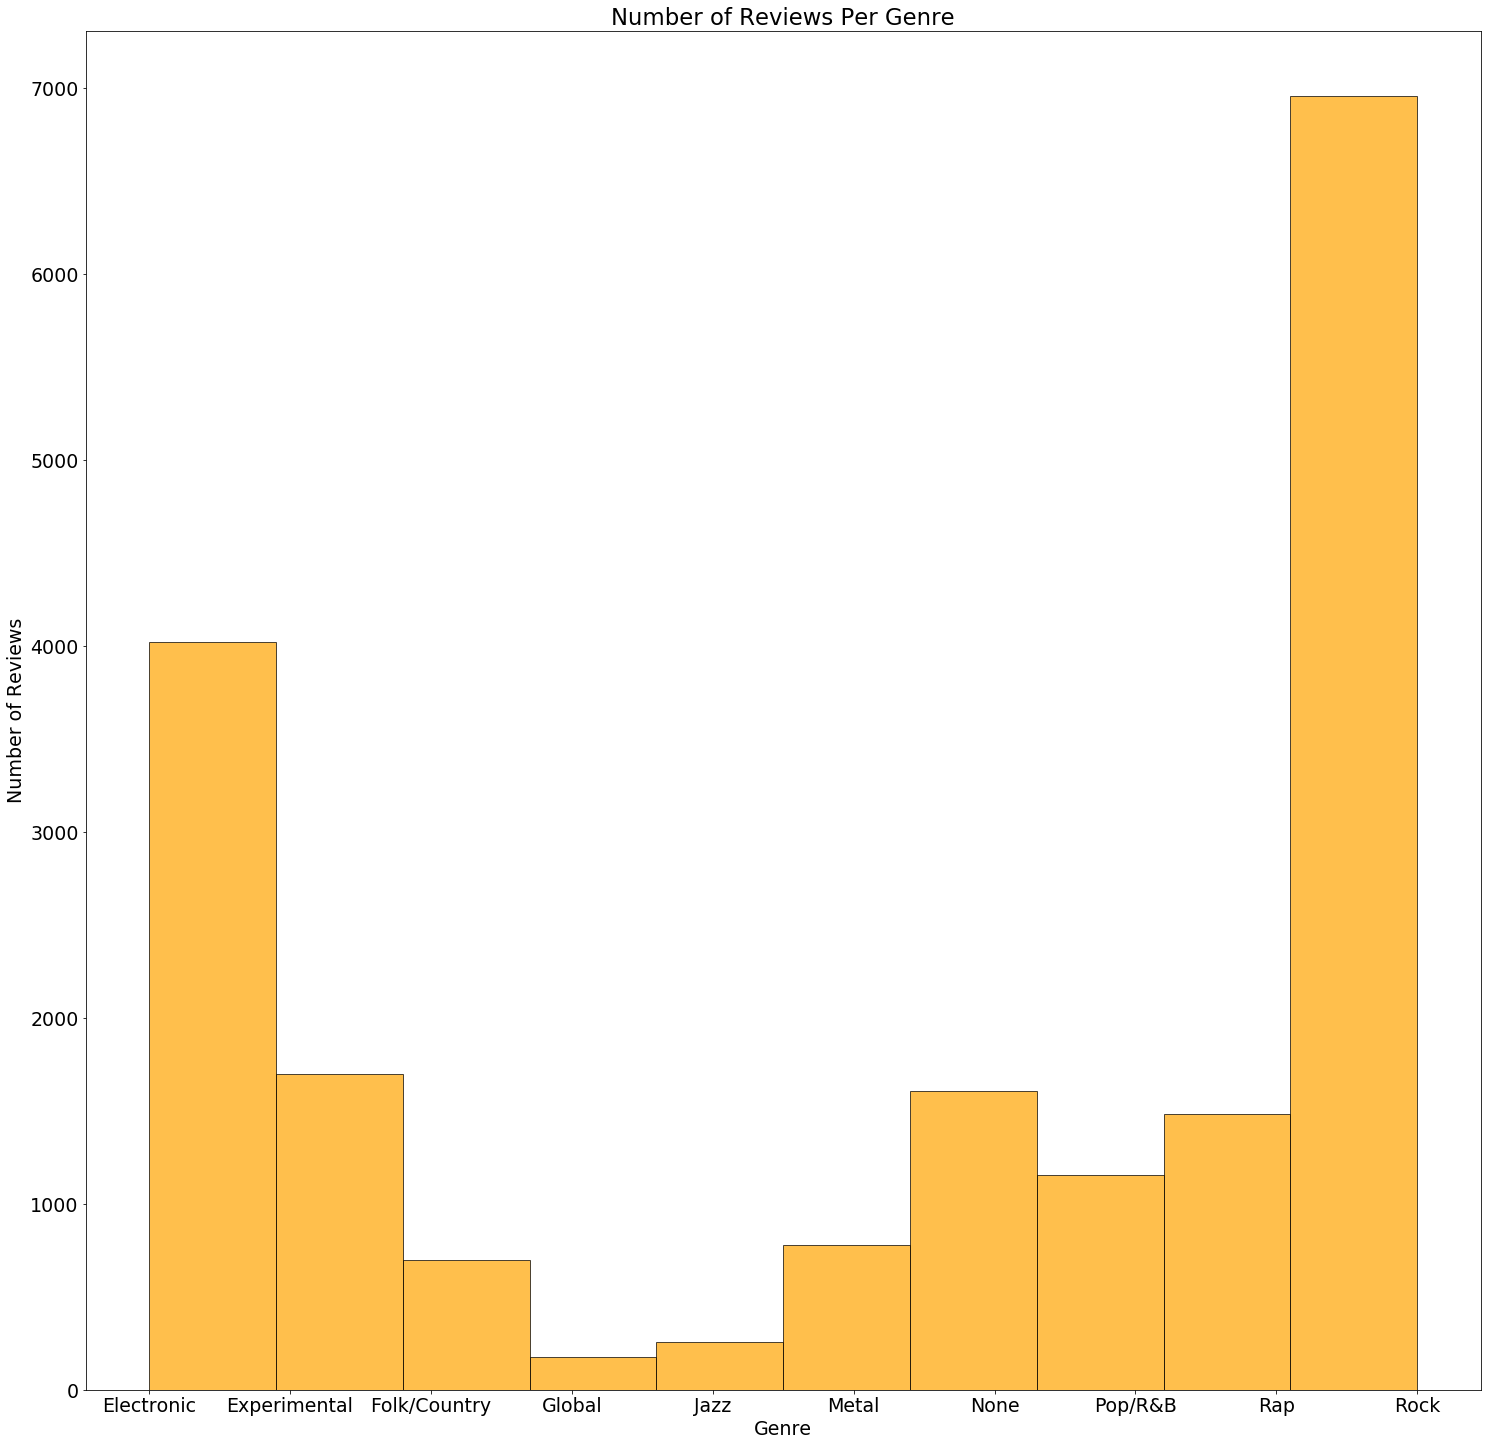

In [112]:
# number of reviews per genre
plt.figure(figsize=(25, 25))
plt.rcParams.update({'font.size': 19})
plt.hist(reviews['genre'], color='orange', alpha=0.7, edgecolor='black')
plt.title("Number of Reviews Per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Reviews")
plt.show()

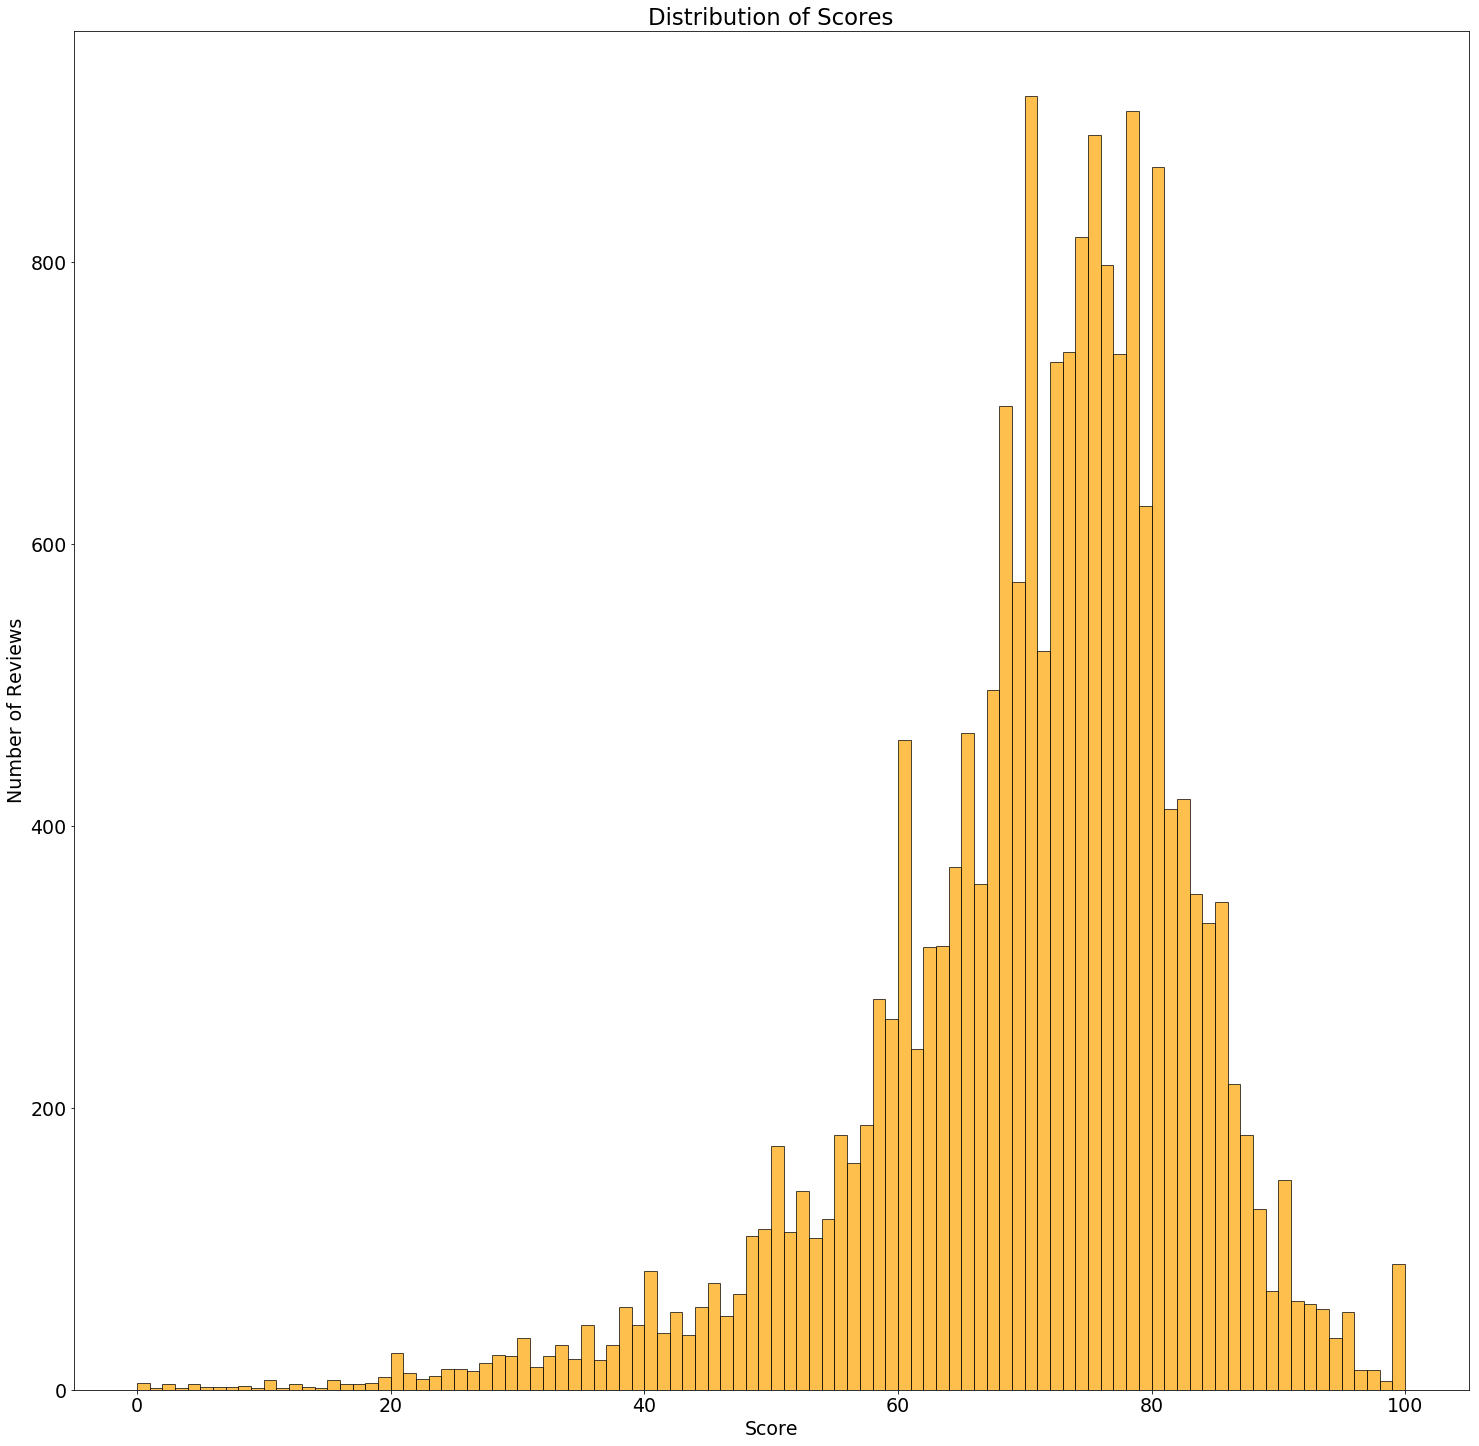

In [131]:
# Distribution of scores
plt.figure(figsize=(25, 25))
plt.rcParams.update({'font.size': 19})
plt.hist(reviews['score_of_100'], bins=100, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Number of Reviews")
plt.show()

In [98]:
# Count the words in the reviews -- takes a long time
count_array = []
for i in reviews.index:
    count = len(nltk.word_tokenize(str(reviews["review"][i])))
    count_array.append(count)
reviews["review_w
        ord_count"] = count_array

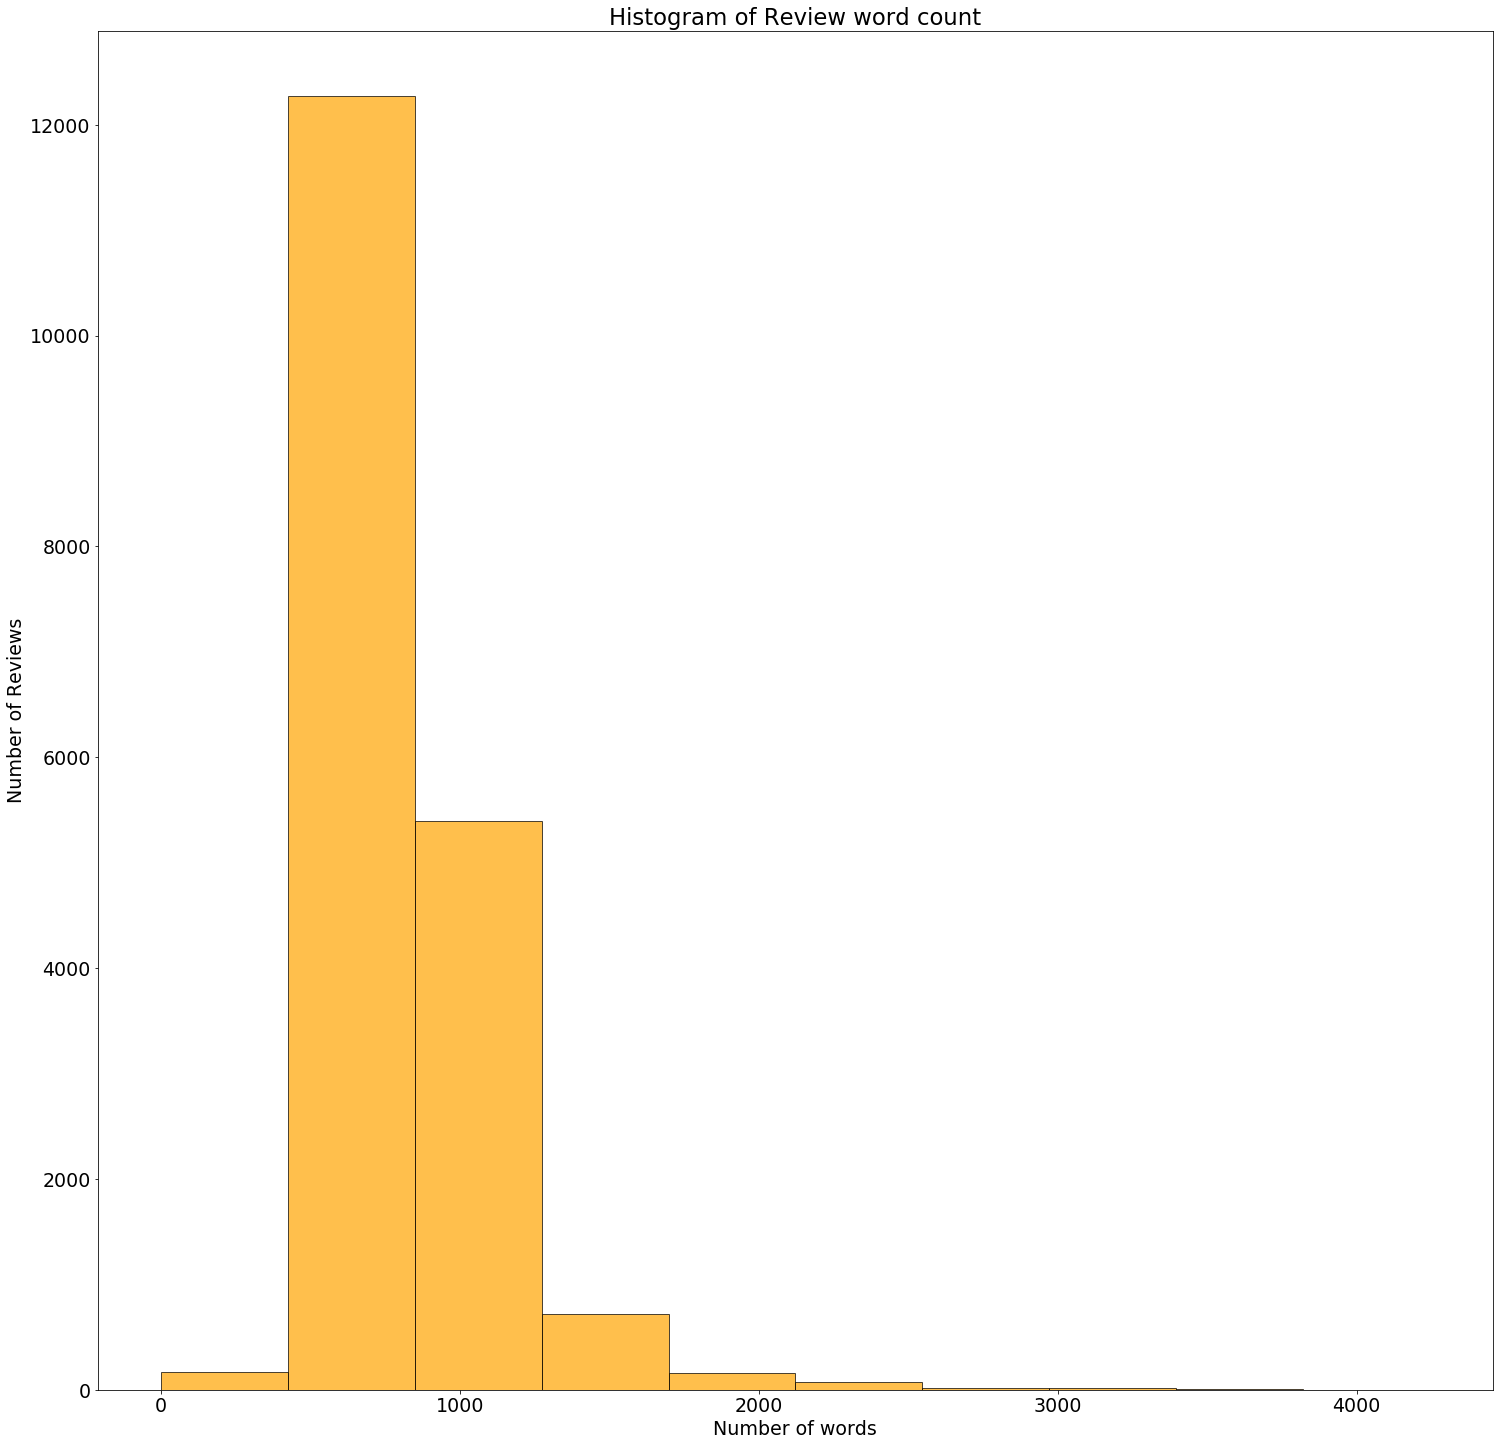

In [104]:
# Distribution of word count for reviews
plt.figure(figsize=(25, 25))
plt.rcParams.update({'font.size': 19})
plt.hist(reviews['review_word_count'], color='orange', alpha=0.7, edgecolor='black')
plt.title("Histogram of Review word count")
plt.xlabel("Number of words")
plt.ylabel("Number of Reviews")
plt.show()

In [148]:
plt.bar(groupped_by_genre['genre'], groupped_by_genre['score'], color='orange', alpha=0.7, edgecolor='black')

KeyError: 'genre'

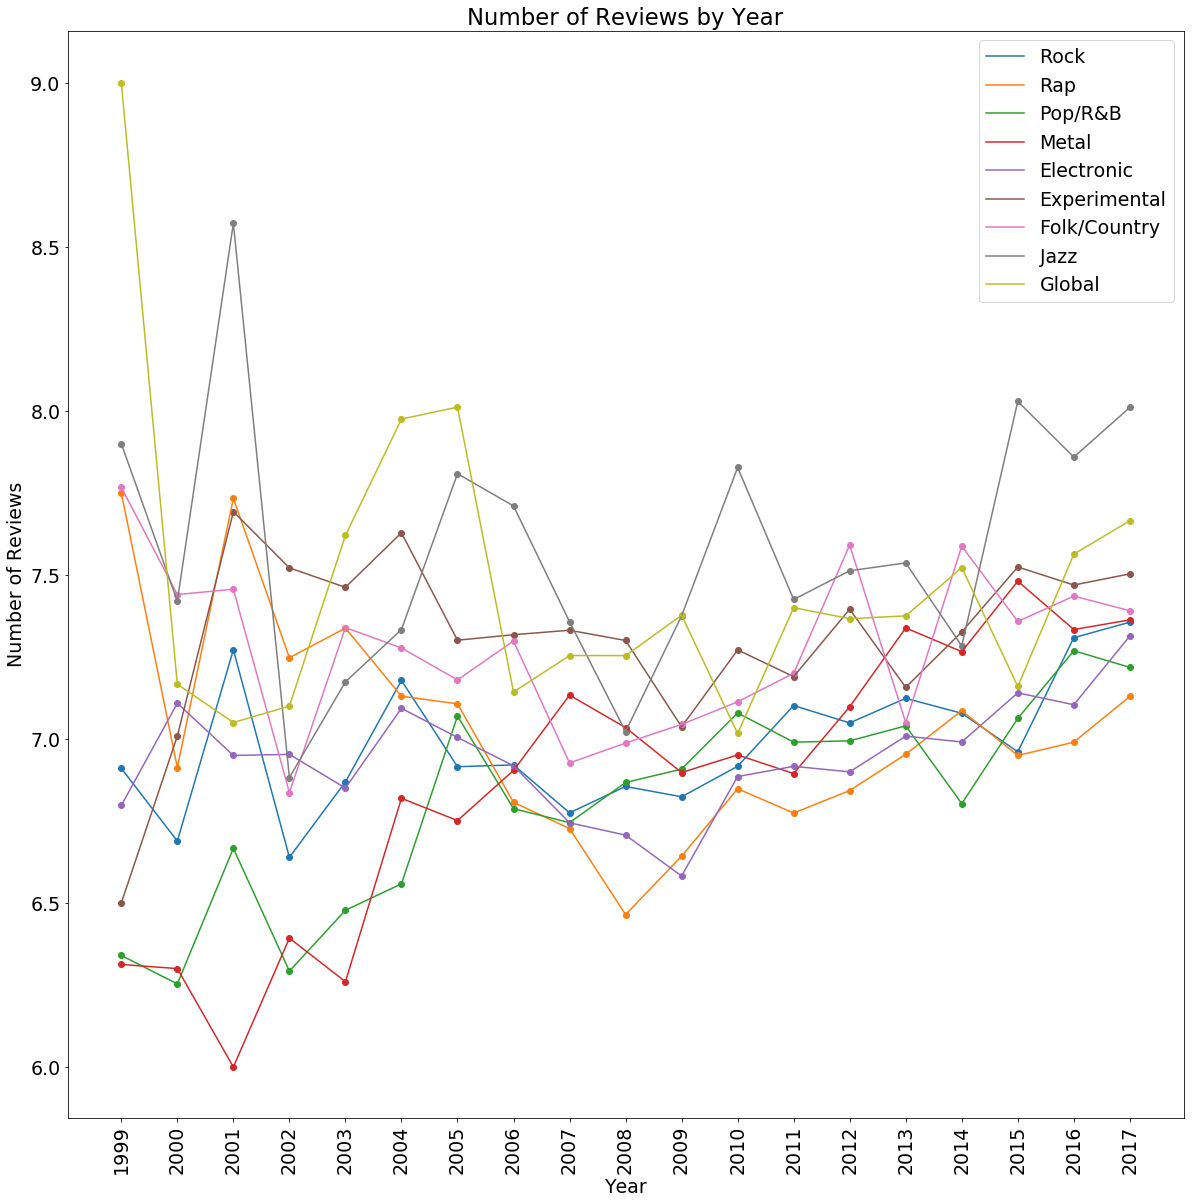

In [91]:
# Mean score by genre by year
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
for genre in reviews['genre'].unique():
    if genre != 'None':
        data = reviews.loc[reviews['genre'] == genre]
        data = data.groupby(reviews['date'].dt.year).aggregate('mean')
        ax.scatter(data.index, data['score'], label=None)
        ax.plot(data.index, data['score'], label=genre)
x_labels = range(1999,2018,1)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(x_labels)
plt.title("Number of Reviews by Year")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.show()

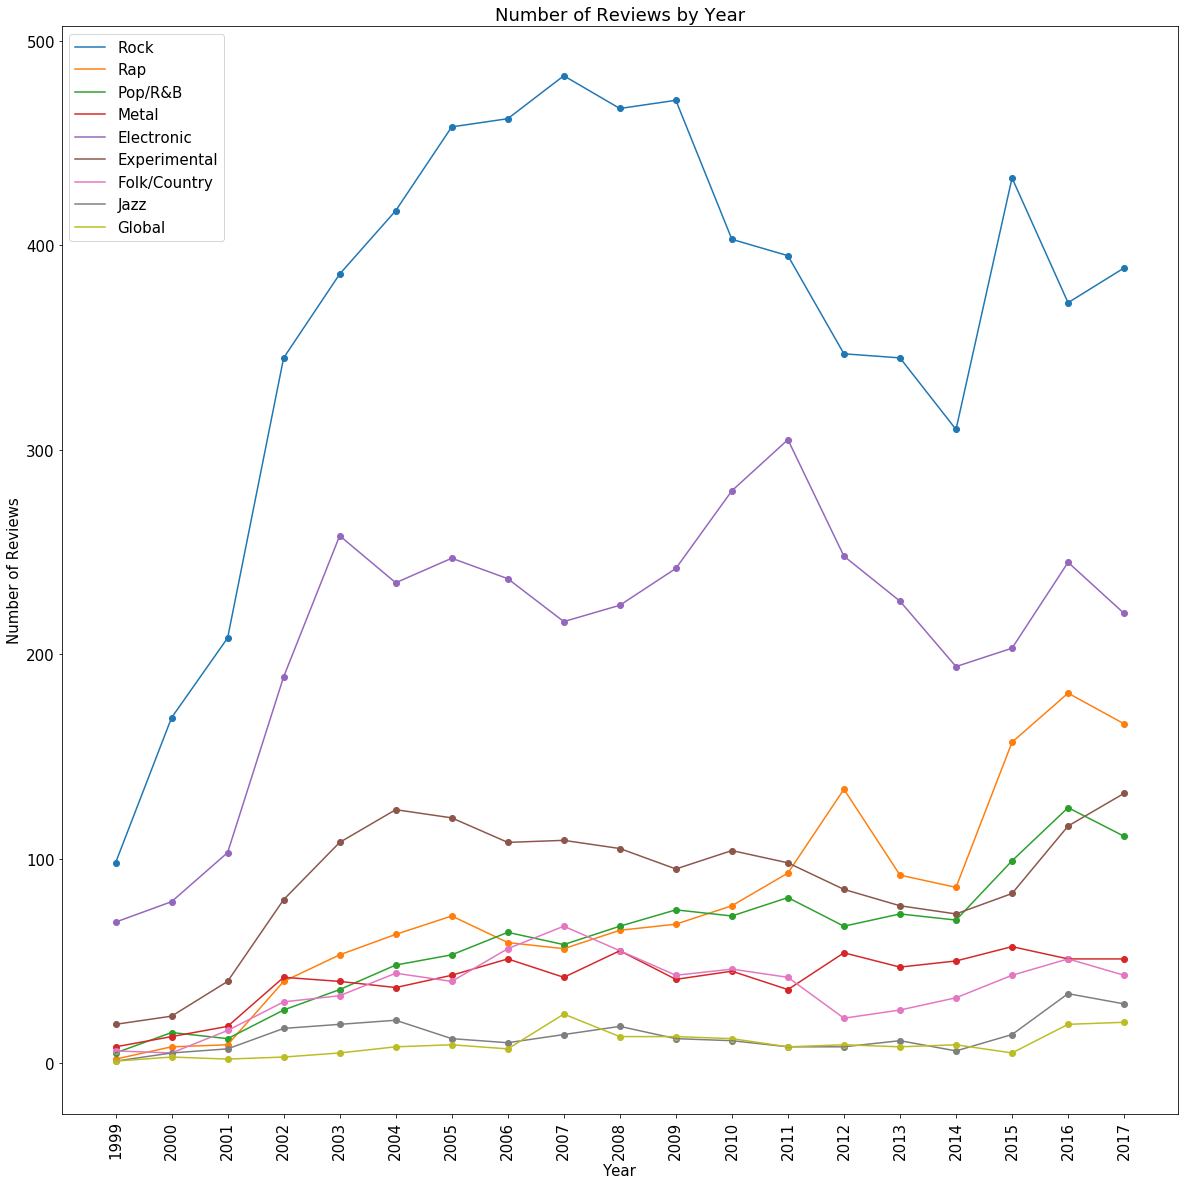

In [92]:
# Number of albums per genre over time
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
for genre in reviews['genre'].unique():
    if genre != 'None':
        data = reviews.loc[reviews['genre'] == genre]
        data = data.groupby(reviews['date'].dt.year).aggregate('count')
        ax.scatter(data.index, data['score'], label=None)
        ax.plot(data.index, data['score'], label=genre)
    
x_labels = range(1999,2018,1)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(x_labels)
plt.title("Number of Reviews by Year")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.show()

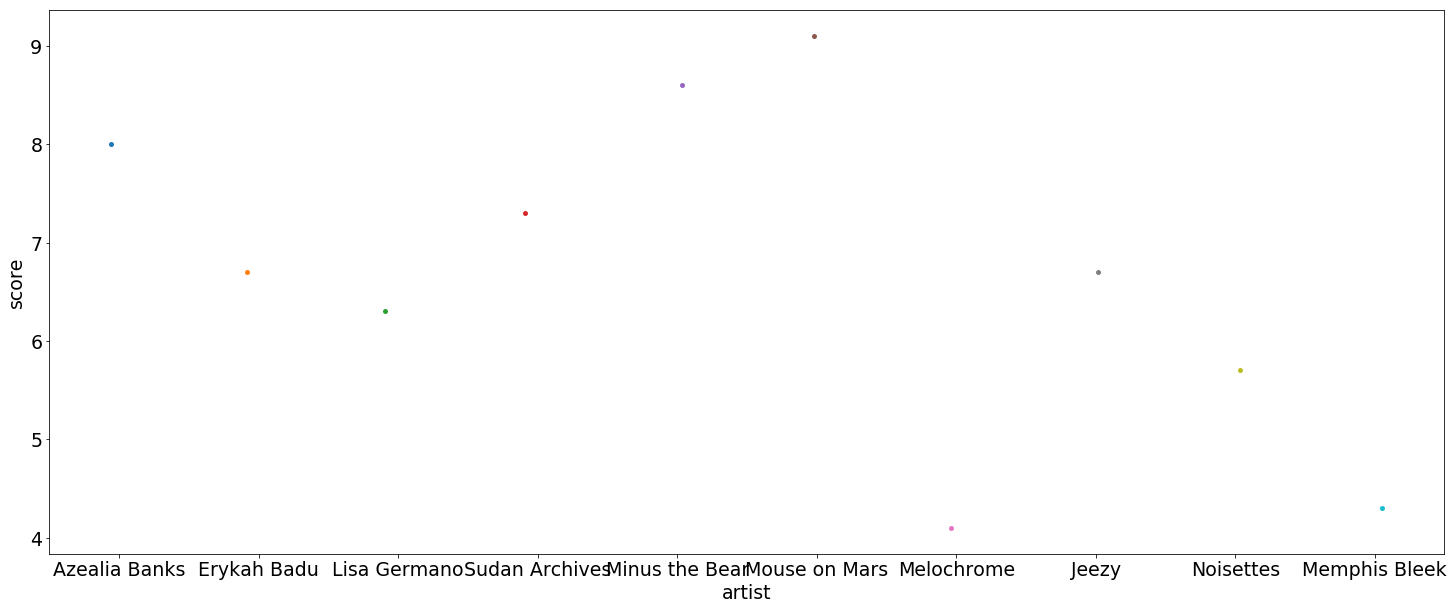

In [90]:
# Selects a random sample of reviews for artists
# sample = reviews.sample(n=10, random_state=0)
plt.figure(figsize=(25, 10))
sns.stripplot(x=sample['artist'], y=sample['score'], jitter=True)
plt.show()

# Analysis